# Data Science Module 121
## Hypothesis Testing and Confidence Intervals

# Objectives

* Explain the purpose of a t-test and identify applications
* Set up and run a one-sample t-test and a two-sample, independent t-test
* Explain the purpose of confidence intervals and identify applications for their use
* Demonstrate how to build a confidence interval around a sample estimate


___
## Statistical Inference

![Inferential Statistics](https://slideplayer.com/slide/5130463/16/images/2/Statistical+Inference.jpg)

Recall that we use sample statistics to estimate population parameters. Our goal is to calculate sample statistics and then rely on properties of a random sample (and perhaps additional assumptions) to be able to make inferences that we generalize to the larger population of interest.

Below is a table comparing some example sample statistics and population parameters:

Metric  |Statistic  |Parameter 
------------- | --------------- | -------------
mean   | $$\bar{x} = \frac{\sum x}{n}$$ | $$ \mu = \frac{\sum x}{N} $$ 
variance | $$ s^2 = \frac{\sum_i (x_i - \bar{x})^2}{n-1} $$ | $$ \sigma^2 = \frac{\sum_i (x_i - \mu)^2}{N}  $$
standard deviation   | $$ s = \sqrt{\frac{\sum_i (x_i - \bar{x})^2}{n-1}} $$ | $$ \sigma = \sqrt{\frac{\sum_i (x_i - \mu)^2}{N} } $$
correlation | $$ r = \frac{\sum(x_i - \bar{x})(y_i - \bar{y})}{(n-1)s_xs_y }$$ | $$r = \frac{\sum(x_i - \mu_x)(y_i - \mu_y)}{(n)\sigma_x\sigma_y }$$

# The Normal Distribution

The Normal distribution is arguably the most commonly used distribution in all of statistics. **Normality** is an assumption that underlies many statistical tests and serves as a convenient model for the distribution of many (but not all!) variables.

The Normal distribution is created with two parameters: 
- the population mean
- the population standard deviation. 

If a variable follows a Normal distribution exactly, its mean, median, and mode will all be equal.

99.96741672977963 15.04778942641972


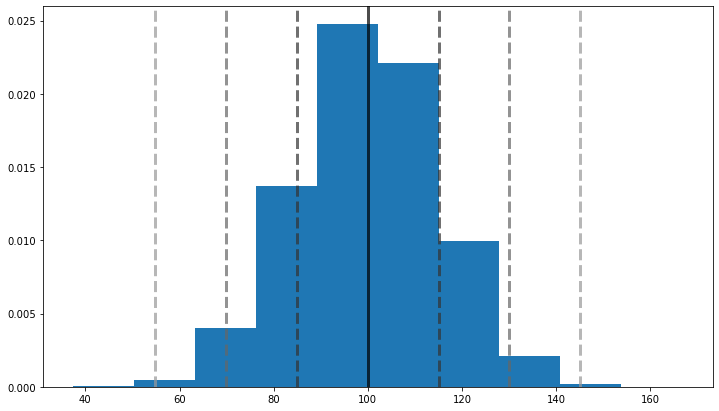

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Set mean and standard deviation
mu, sigma = 100, 15

#Here is a set of points
xpoints=np.random.normal(mu, sigma, 50000)

avg=np.mean(xpoints)
std=np.std(xpoints)

#check your values
print(avg,std)

#Define variables for 1,2,3 sigma
std1 = avg + std
std1_neg = avg - std
std2 = avg + 2*std
std2_neg = avg - 2*std
std3 = avg + 3*std
std3_neg = avg - 3*std



#Start Figure
#---------------------------------------
# initialize a matplotlib "figure"
fig, ax = plt.subplots(figsize=(12,7))

# 68%:
ax.axvline(std1_neg, ls='dashed', lw=3, color='#333333', alpha=0.7)
ax.axvline(std1, ls='dashed', lw=3, color='#333333', alpha=0.7)

# 95%
ax.axvline(std2_neg, ls='dashed', lw=3, color='#666666', alpha=0.7)
ax.axvline(std2, ls='dashed', lw=3, color='#666666', alpha=0.7)

# 99.7%
ax.axvline(std3, ls='dashed', lw=3, color='#999999', alpha=0.7)
ax.axvline(std3_neg, ls='dashed', lw=3, color='#999999', alpha=0.7)

#mean
ax.axvline(avg, lw=3, color = 'black',  alpha=0.7)



# plot the lines using matplotlib's hist function:
ax.hist(xpoints, density=True, bins= 10)


plt.show();

### An example

The Bodytemp.csv file contains body temperature measurements for 223 healthy men and women aged 18-40 taken using an electronic digital thermometer. The mean body temperature from multiple measurements over three days was computed for each individual, and this summary measure is recorded.


Source: Mackowiak, P. A., Wasserman, S. S., and Levine, M. M. (1992), "A Critical Appraisal of 98.6 Degrees F, the Upper Limit of the Normal Body Temperature, and Other Legacies of Carl Reinhold August Wunderlich," Journal of the American Medical Association, 268, 1578-1580.

In [ ]:

data_url = 'https://raw.githubusercontent.com/Chelsea-Myers/Lambda-Intro/master/Bodytemp.csv'

temperature = pd.read_csv(data_url)

print(temperature.shape)
temperature.head()

(223, 2)


ID  Body_temp
0   36       96.7
1  254       96.9
2  282       97.0
3  286       97.0
4  302       97.0

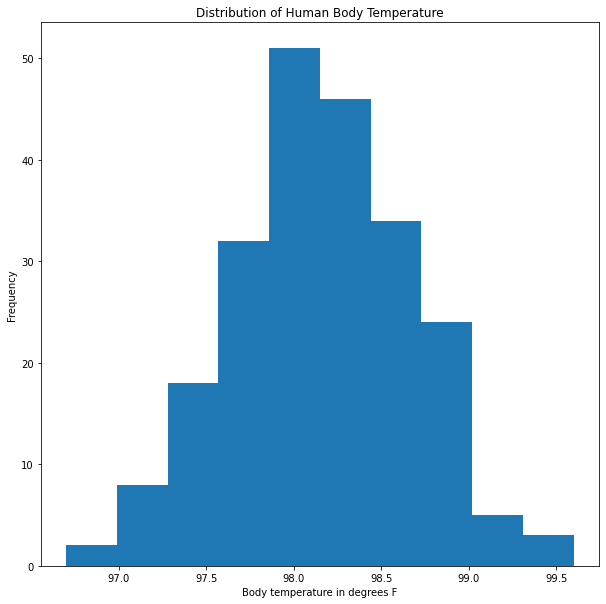

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))

plt.hist(temperature['Body_temp'])

plt.xlabel('Body temperature in degrees F')
plt.ylabel('Frequency')
plt.title(r'Distribution of Human Body Temperature')

plt.show()


---
### Reminder
**The Central Limit Theorem** states that the sampling distribution of the sample means approaches a normal distribution as the sample size gets larger — no matter what the shape of the population distribution. This fact holds especially true for sample sizes over 30.

All this is saying is that as you take more samples, especially large ones, your graph of the sample means will **look more** like a normal distribution.

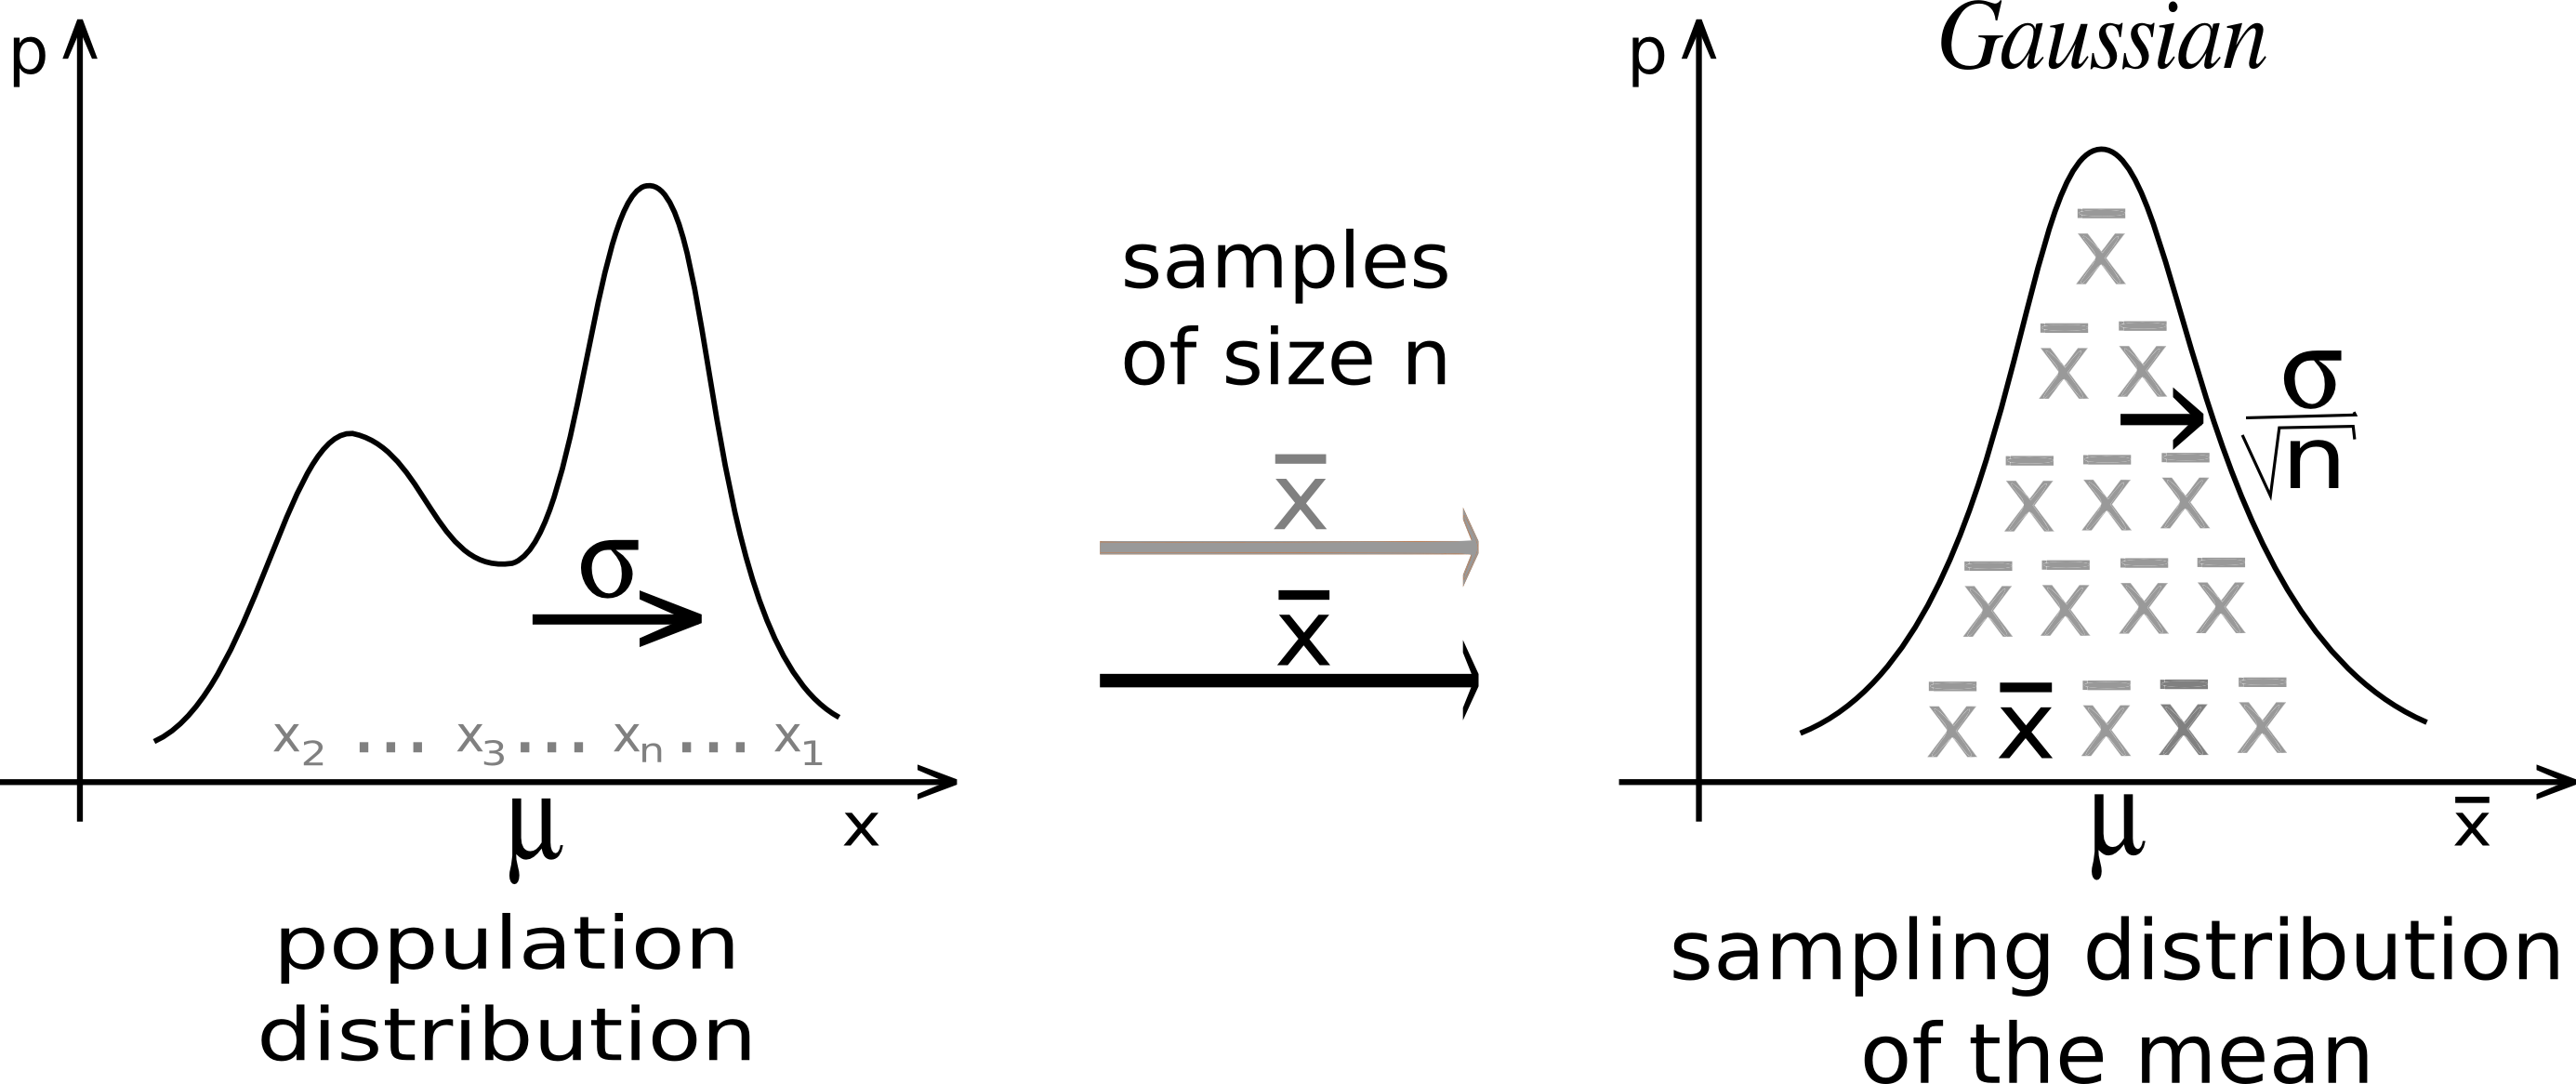

While the Central Limit Theorem works perfectly in theory, in reality, the distribution of a sample mean will not always be exactly Normal. For this reason, we may identify other types of distributions to make inferences about our population.

The t-distribution has a similar shape to the Normal Distribution (Z-Distribution), but is able to more properly flex when you have a smaller sample size. 

In general, this distribution is used when you have a small sample size (under 30) or you don’t know the population standard deviation. For practical purposes (i.e. in the real world), this is nearly always the case. You’ll likely be using it in real life situations more than the normal distribution. If the size of your sample is large enough, the two distributions are practically the same.


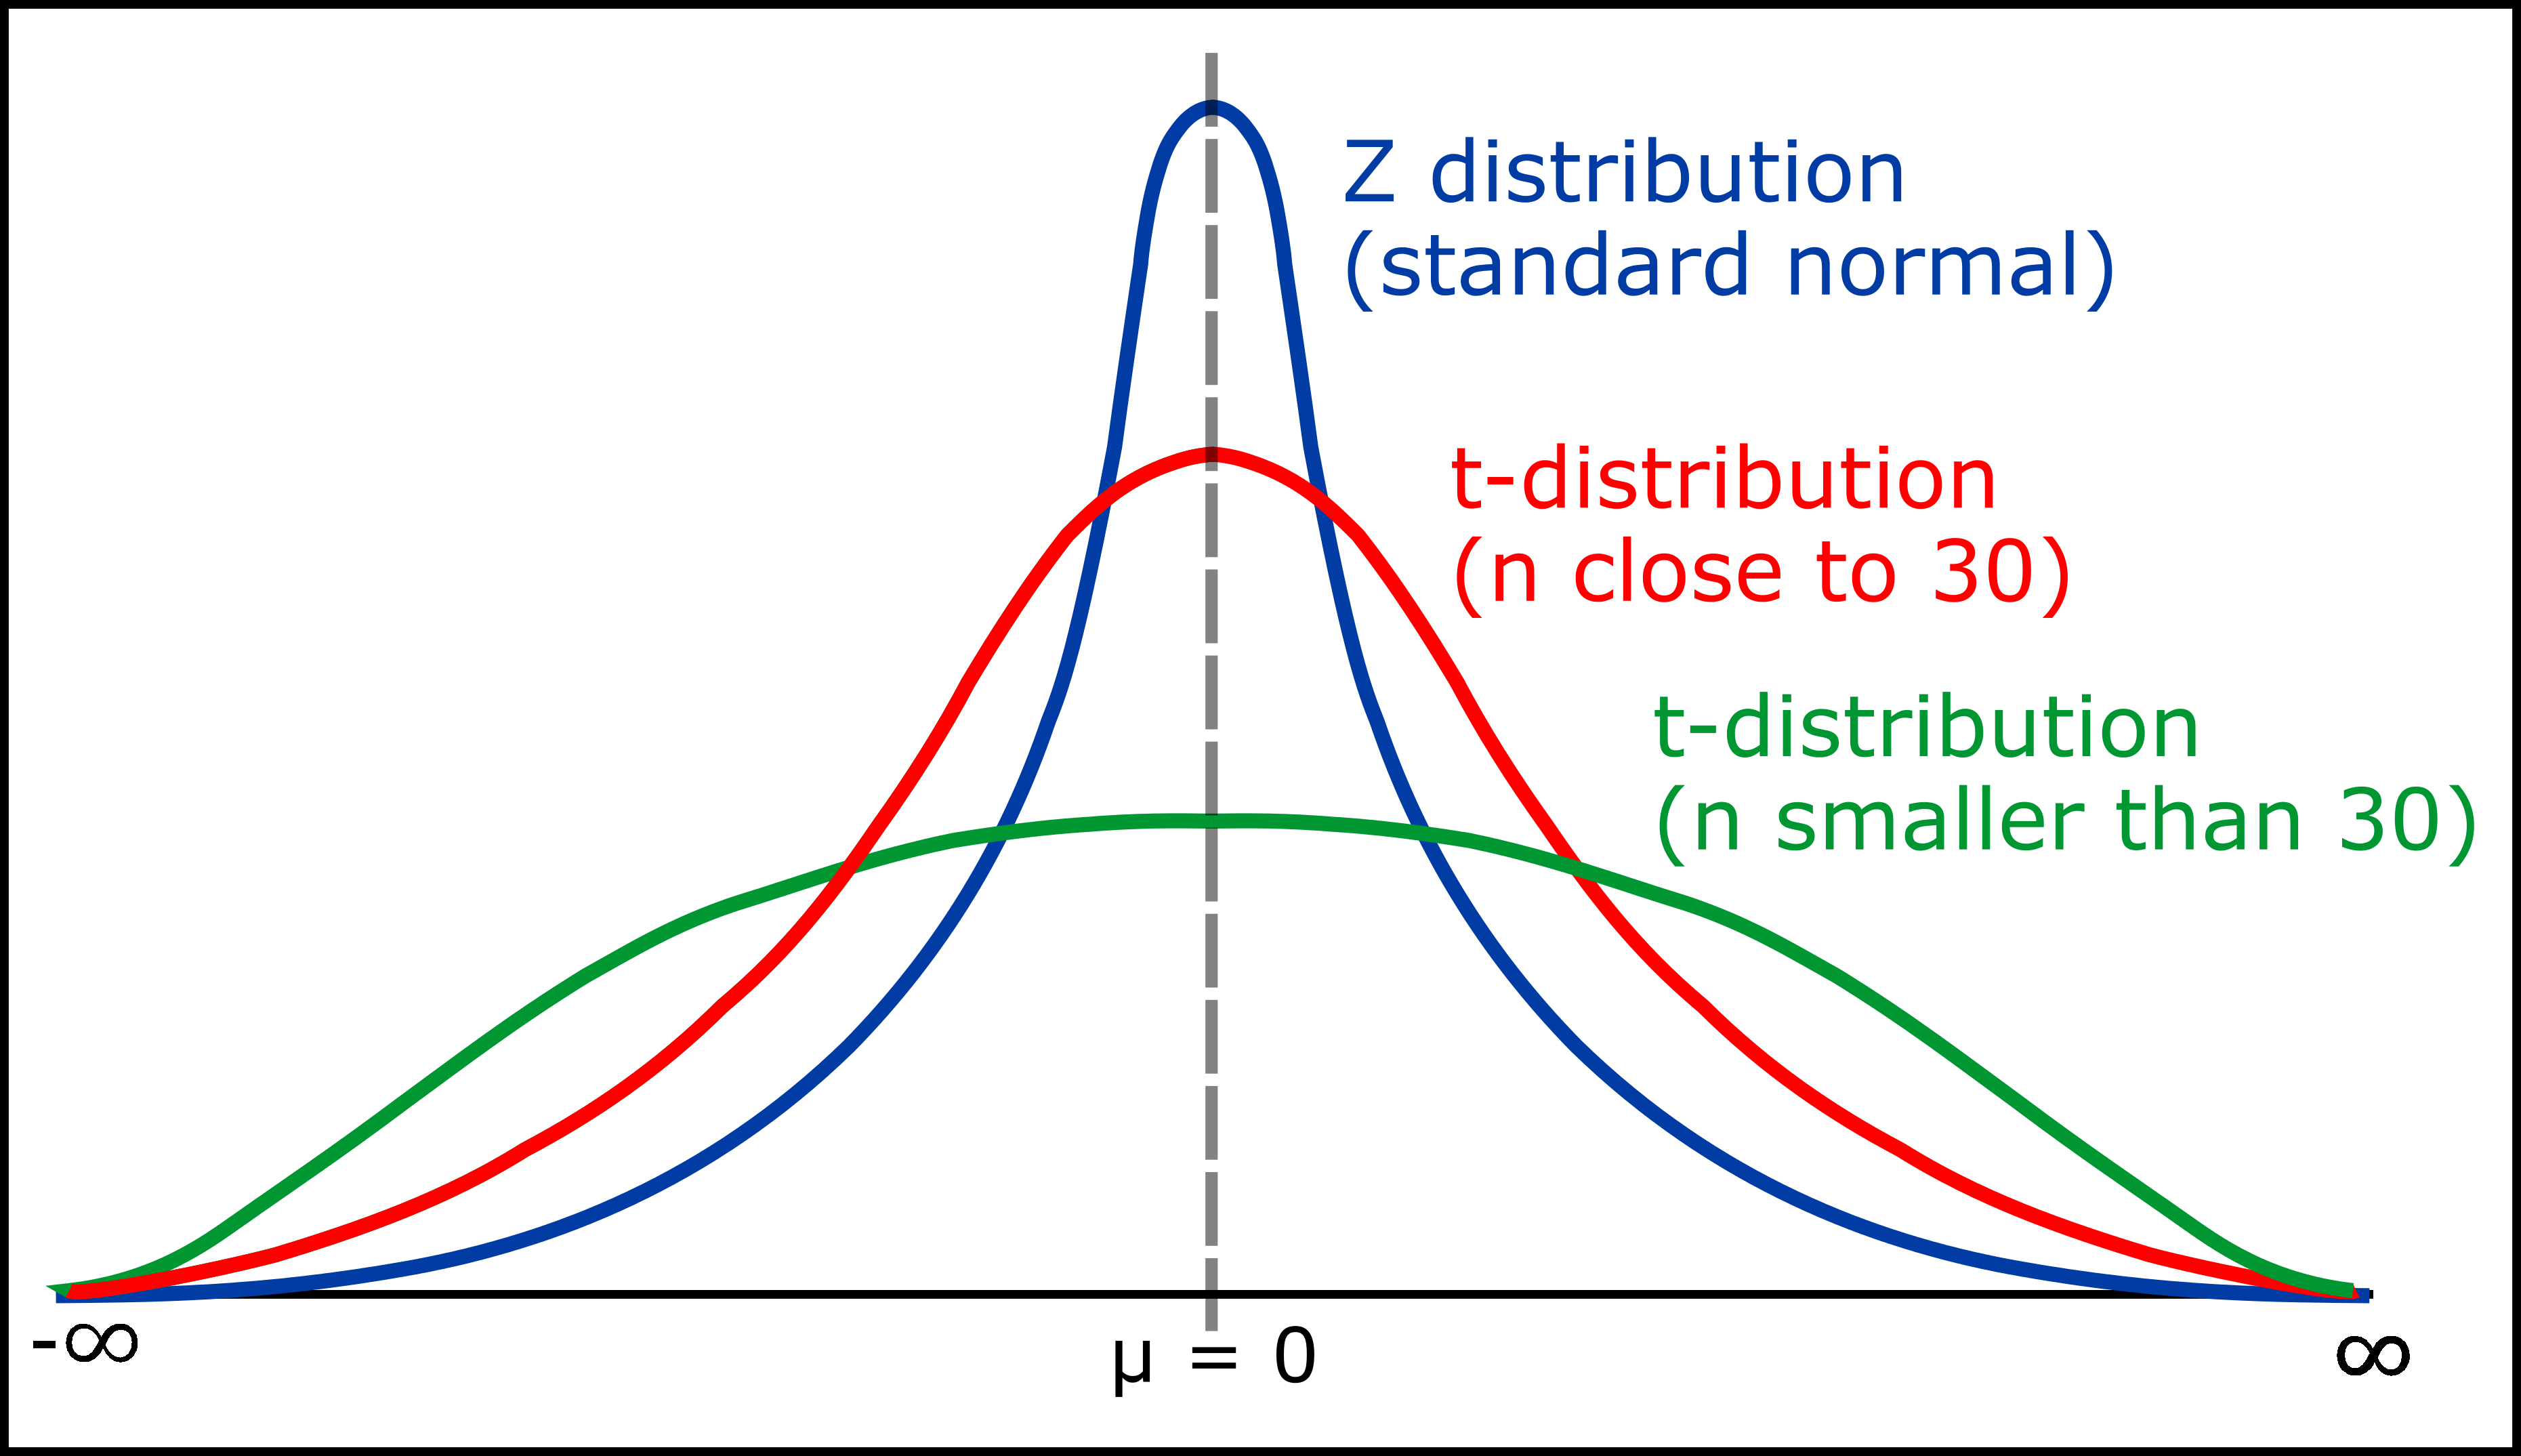

The t-distribution was discovered/invented by [William Sealy Gosset](https://en.wikipedia.org/wiki/William_Sealy_Gosset) when he was working at the Guiness Brewery.

His results were published under the pseudonym "Student T-Test."

## Hypothesis Testing


What is the importance of understanding these distributions? We would like to be able to recognize if there's a statistically significant difference between our samples and a reference value, or two samples from one group, or multiple groups within a set of categories, etc. 
- How would we tell if there is a difference between our groups? 
- How would we know if this difference was real or if our finding is simply the result of chance?


For example, let's say we wanted to compare the video game habits of people in different age groups: people aged 18-25 play an average of 7.48 hours a week, while people aged 36-45 play an average of 7.09 hours a week. Are these two averages significantly different? 
- Do we have enough information? (No)
- Again, how would we know if this difference was real or if our finding is simply the result of chance?

Hypothesis Testing is a family of statistical methods used to identify whether a sample of observed data can be used to accept or reject a predefined hypothesis. 

[Source](https://www.limelight.com/resources/white-paper/state-of-online-gaming-2020/)

___
Generally speaking, we start with a **null hypothesis** and an **alternative hypothesis**, which is the opposite of the null. Then, you check whether the data support rejecting your null hypothesis or fail to reject the null hypothesis.

- The __null hypothesis__ is, in general, the boring stuff i.e. it assumes that nothing interesting happens/happened.
- The __alternative hypothesis__ is, where the action is i.e. some observation/ phenomenon is real (i.e. not a fluke) and statistical analysis will give us more insights on that.




For example:

- **Null hypothesis**: There is no relationship between age and video game time.
- **Alternative hypothesis**: There is a relationship between age and video game time.

Note that "failing to reject" the null hypothesis is not the same as "accepting" it. Your alternative hypothesis may indeed be true, but you don't necessarily have enough data to show that yet.

This distinction is important for helping you avoid overstating your findings. You should only state what your data and analysis can truly represent.

### Another Example
Source: A.N. Garand and L.N. Bell (1997). "Caffeine Content of Fountain and Private-Label Store Brand Carbonated Beverages," Journal of the American Dietetic Association, Vol. 97, #2, pp. 179-182.

Soft drinks like Coke and Pepsi are manufactured to have a standard caffeine content. For example, a 12-oz serving of Coke has 34 mg of caffeine, and a 12-oz serving of Pepsi has 37.6 mg of caffeine. However, fountain soft drinks are typically mixed in individual restaurant dispensers, so it is more difficult to maintain a standard level of caffeine per serving. 

Soft drinks like Coke and Pepsi are manufactured to have a standard caffeine content. For example, a 12-oz serving of Coke has 34 mg of caffeine, and a 12-oz serving of Pepsi has 37.6 mg of caffeine. However, fountain soft drinks are typically mixed in individual restaurant dispensers, so it is more difficult to maintain a standard level of caffeine per serving. 

Imagine you are in a quality assurance role at Coke assigned to ensure that franchise restaurants that serve Coke beverages are maintaining product consistency.  In particular, you wish to ensure that Coke mixed in fountain soft drink dispensers has the standard caffeine content of 34 mg per 12 oz (the same as in a 12 oz can of Coke).  If the caffeine content is very different than 34 mg per 12 oz, that indicates managers of the franchises should be retrained.



* The **null hypothesis**, denoted $H_0$, is that there's no difference in the **means** between your sample and your reference value ($\mu_1 = \mu_2$)
* The **alternative hypothesis**, denoted $H_1$, is that that there *is* a difference. Some differences can be:
  * low-tailed: $H_1: \mu_1 > \mu_2$
  * high-tailed: $H_1: \mu_1 < \mu_2$
  * two-tailed: $H_1: \mu_1 \neq \mu_2$

For our purposes today, **we will only be working with two-tailed tests.**

In [ ]:
import pandas as pd

data_url = 'https://raw.githubusercontent.com/dansmyers/Statistics/master/Soda.csv'

df = pd.read_csv(data_url, skipinitialspace=True, header=0)

print(df.shape)
df.head()

(50, 2)


Drink  Caffeine
0      1     47.32
1      2     43.78
2      3     48.12
3      4     43.25
4      5     46.42

## CLT


Mathematically, we know that if the mean caffeine content in all fountain soda is 34mg per 12 oz, most samples we take from that population will have a mean that is very close to 34mg per 12 oz.
![alt text](https://raw.githubusercontent.com/dansmyers/Statistics/master/Normal%20dist%202.png)

![alt text](https://raw.githubusercontent.com/dansmyers/Statistics/master/Normal%20dist%203.png)

In [ ]:
print(df[['Caffeine']].mean())

Caffeine    37.9402
dtype: float64


![alt text](https://raw.githubusercontent.com/dansmyers/Statistics/master/Normal%20dist%201.png)

## The p-Value
We are trying to answer a crucial question: "What is the chance of observing the test-statistic, this extreme, for this sample (considering its size and a suitable probabilistic dynamics governing it), purely randomly?" In other words, what if a value or predicted value is the result of complete random chance? 

This "chance" is called the p-value - the probability of observing the test-statistic, as is, given the Null hypothesis is true (e.g., this grouping of numbers is the result of random chance and not significant). And this probability is calculated under the assumption of a certain probability distribution (that the test statistic is generated from).

**P-values** are derived from a **test statistic**, such as a $z$-score, $t$-score, or $\chi^2$-score. For each different type of statistical test, there is a different mapping from a test statistic to p-value.

$P(Data | H_0)$

The **p-value** is the probability that, **GIVEN THE NULL HYPOTHESIS IS TRUE**, we would observe the current set of data. 

The above is almost true, but more simply worded. The actual definition: 

> For a given statistical model, **GIVEN THE NULL HYPOTHESIS IS TRUE**, the _p-value_ is the probability of observing a statistical summary at least as extreme as the actual observed results.

If your p-value is less than a chosen significance level $\alpha$, then you may choose to reject the null hypothesis and accept there is reasonable evidence to support the alternative hypothesis.

### T-Test


The t test tells you how significant the differences between groups are; In other words it lets you know if those differences (measured in means) could have happened by chance.

There are three main types of t-test:

- A One sample t-test tests the mean of a single group against a known mean.
- An Independent Samples t-test compares the means for two groups.
- A Paired sample t-test compares means from the same group at different times (say, one year apart).

The t-statistic   is a ratio between the difference between two groups and the difference within the groups. The larger the t stat, the more difference there is between groups. The smaller the t stat, the more similarity there is between groups. A t statistic of 3 means that the groups are three times as different from each other as they are within each other. When you run a t test, the bigger the t-value, the more likely it is that the results are repeatable

![alt text](https://raw.githubusercontent.com/dansmyers/Statistics/master/Normal%20dist%204.png)
![alt text](https://raw.githubusercontent.com/dansmyers/Statistics/master/Normal%20dist%205.png)

## Significance Level

In 1925, Ronald Fisher advanced the idea of statistical hypothesis testing, which he called "tests of significance", in his publication Statistical Methods for Research Workers. Fisher suggested a probability of one in twenty (0.05) as a convenient cutoff level to reject the null hypothesis. In a 1933 paper, Jerzy Neyman and Egon Pearson called this cutoff the significance level, which they named alpha. They recommended that alpha  be set ahead of time, prior to any data collection.

Despite his initial suggestion of 0.05 as a significance level, Fisher did not intend this cutoff value to be fixed. In his 1956 publication Statistical Methods and Scientific Inference, he recommended that significance levels be set according to specific circumstances.


[Source](https://en.wikipedia.org/wiki/Statistical_significance)


## Follow Along: One Sample T-Test
We're going to use the scipy library to calculate the t-statistic and p-value for a hypothesis test, using the soda dataset. 

Null hypothesis: The mean caffeine content in ALL 12 oz servings of fountain Coke is __________ (the same as the caffeine content in a 12 oz can of Coke).

Alternative hypothesis: The mean caffeine content in ALL 12 oz servings of fountain Coke is __________.

$H_0: \mu =$ __________

$H_a: \mu \neq$ __________

In [ ]:

import scipy.stats as st

pval = st.ttest_1samp(df['Caffeine'], 34)

print(pval)

Ttest_1sampResult(statistic=5.313255802097796, pvalue=2.620466428255138e-06)


---
### Using Body Temperature
#Back to body temperature

Source: Mackowiak, P. A., Wasserman, S. S., and Levine, M. M.  (1992), "A Critical Appraisal of 98.6 Degrees F, the Upper Limit of the Normal Body Temperature, and Other Legacies of Carl Reinhold August Wunderlich," Journal of the American Medical Association_, 268, 1578-1580.



Everyone knows that 98.6 F (37.0 C) is the normal human body temperature.  But is that actually correct, and – come to think of it – how does everyone know that in the first place?

A German physician named Carl Reinhold August Wunderlich is generally credited with originating this idea, which was based on – reportedly – more than one million axiliary temperature readings taken from 25,000 subjects and was published in his 1868 book Das Verhalten der Eigenwärme in Krankheiten (which translates to The Behavior of the Self-Warmth in Diseases). But was he correct? History tells that his thermometer was a foot long and took 20 minutes to determine a subject’s temperature. For a measure that is used so often to determine general health, it would be a good idea to use modern instruments to confirm or refute his results.

In 1992, three physicians from the University of Maryland School of Medicine set out to do just that, measuring body temperatures for 223 healthy men and women aged 18-40 one to four times a day for three consecutive days using an electronic digital thermometer. The mean body temperature was computed for each individual, and this summary measure is recorded in the Bodytemp.xlsx dataset. We wish to determine if there is evidence for or against the claim that the mean healthy human body temperature is 98.6 F.

In [ ]:
import pandas as pd

temp_data_url = 'https://raw.githubusercontent.com/dansmyers/Statistics/master/Bodytemp.csv'

temp_df = pd.read_csv(temp_data_url, skipinitialspace=True, header=0)

print(temp_df.shape)
temp_df.head()

(223, 2)


ID  Body_temp
0   36       96.7
1  254       96.9
2  282       97.0
3  286       97.0
4  302       97.0

Null hypothesis: 

Alternative hypothesis: 

$H_0: \mu =$ 

$H_a: \mu \neq$ 

In [ ]:
print(temp_df[['Body_temp']].mean())

temp_pval = st.ttest_1samp(temp_df['Body_temp'], 98.6)

print(temp_pval)



Body_temp    98.165022
dtype: float64
Ttest_1sampResult(statistic=-12.318493242039102, pvalue=6.463815069851756e-27)


## Follow Along: Two Sample Independent T-Test

Source: R.J. Gladstone (1905). "A Study of the Relations of the Brain to the Size of the Head", Biometrika, Vol. 4, pp105-123.

The Brainhead.csv dataset provides information on 237 individuals who were subject to post-mortem examination at the Middlesex Hospital in London around the turn of the 20th century. Study authors used cadavers to see if a relationship between brain weight and other more easily measured physiological characterizes such as age, sex, and head size could be determined. The end goal was to develop a way to estimate a person’s brain size while they were still alive (as the living aren’t keen on having their brains taken out and weighed). 

We wish to determine if there is a relationship between age and brain weight in healthy human adults.

In [ ]:
import pandas as pd
data_url = 'https://raw.githubusercontent.com/Chelsea-Myers/Lambda-Intro/master/Brainhead.csv'

Brain_df = pd.read_csv(data_url, skipinitialspace=True, header=0)

print(Brain_df.shape)
Brain_df.head()

(237, 4)


Gender  Age  Head  Brain
0       1    1  4512   1530
1       1    1  3738   1297
2       1    1  4261   1335
3       1    1  3777   1282
4       1    1  4177   1590

Brain size is measured in g.

Age = 1: Individual was 20 - 46 years old

Age = 2: Individual was 46+ years old

The null hypothesis in a 2-independent-sample t-test is that the two population means are __________.  The alternative hypothesis is that the two population means are __________.

Stated in mathematical terms:

$H_0: __________$

$H_a: __________$

In this case, we wish to test the null hypothesis that older and younger people have the same mean brain weight vs. the alternative hypothesis that older and younger people have different brain weights.

Stated in mathematical terms:

$H_0: \mu_{younger} = \mu_{older}$

$H_a: \mu_{younger} \neq \mu_{older}$

We can use the two sample t-test function to test for a statistically significant difference at the alpha = 0.05 level.

In [ ]:
import numpy as np
from scipy import stats

younger_ = Brain_df[Brain_df.Age == 1]

younger = younger_[['Brain']]


older_ = Brain_df[Brain_df.Age == 2]

older = older_[['Brain']]

stats.ttest_ind(younger,older)

Ttest_indResult(statistic=array([2.63553621]), pvalue=array([0.0089596]))

## Breakout 

In [ ]:
import pandas as pd
Titanic = pd.read_csv('https://raw.githubusercontent.com/LambdaSchool/data-science-practice-datasets/main/unit_1/Titanic/Titanic.csv')
Titanic= Titanic.rename(columns= {'Sex':'Gender'})
Titanic.head()

Survived  Pclass                                               Name  \
0         0       3                             Mr. Owen Harris Braund   
1         1       1  Mrs. John Bradley (Florence Briggs Thayer) Cum...   
2         1       3                              Miss. Laina Heikkinen   
3         1       1        Mrs. Jacques Heath (Lily May Peel) Futrelle   
4         0       3                            Mr. William Henry Allen   

   Gender   Age  Siblings/Spouses_Aboard  Parents/Children_Aboard     Fare  
0    male  22.0                        1                        0   7.2500  
1  female  38.0                        1                        0  71.2833  
2  female  26.0                        0                        0   7.9250  
3  female  35.0                        1                        0  53.1000  
4    male  35.0                        0                        0   8.0500

As a group:
- Determine what your null and alternative hypothesis will be. 
- Use the two-sample t-test function to test for a statistically significant difference in ages for both genders. Set your alpha = 0.05 level.

## Confidence Intervals
What are confidence intervals?  Why make them?

When we reject the null hypothesis say, for a one-independent-sample t-test, we say we believe that the population mean is *not* equal to some reference value (recall that the null hypothesis is that the population mean *is* equal to a reference value).  

### Confidence Intervals in Daily Life


*   "How long will it take the brownies to bake?"  About 35 - 40 minutes.
*   "How many cookies should I bake for the bake sale?"  Probably around 2 - 3 dozen.
*   "How many loaves of bread will the bakery sell today?" Around 90 - 100.

The true answer to all of these questions is unknowable ahead of time.  Exactly how long it will take the brownies to bake probably depends on a number of factors including how well your oven is working, how hot and humid it is, the age of the eggs you use, etc.

However, based on personal experience - and perhaps the recipe - we can be very confident that it will take between 35 - 40 minutes for the brownies to be done.  

### Confidence Interval Formula 
The formula for a confidence interval for a population mean is 

$\bar{X}$  $\pm$  $t^* \frac{s}{\sqrt{n}}$ 

Where $\bar{X}$ is the sample _______, s is the sample ___________ and n is the sample _________.

Note that $\frac{s}{\sqrt{n}}$ is the _________________, which is an estimate of the true standard deviation of the sample mean.  

**Another name for the quantity $t^* \frac{s}{\sqrt{n}}$ is the ________________.** 

Nearly all of the information we need to estimate the population mean using a confidence interval comes from our sample.  The only thing we don't get from the sample is __________________.

Let's try with some values.


In [ ]:

data_url = 'https://raw.githubusercontent.com/Chelsea-Myers/Lambda-Intro/master/Bodytemp.csv'

df = pd.read_csv(data_url, skipinitialspace=True, header=0)

print(df.shape)
df.head()

We can use the mean, sd and row counting functions in Python to calculate and save the sample mean body temp ($\bar{X}$ for the CI formula), the sample standard deviation (s in the CI formula) and the sample size (n in the formula).

In [ ]:
#Calculate mean

In [ ]:
#Calculate SD

In [ ]:
#Calculate n

We can calculate the standard error of the sample mean by dividing the standard deviation of the sample by the square root of the sample size.

In [ ]:
#Calculate SE

Let's plug these quantities into the CI formula.  We're almost there!

###$\bar{X}$  $\pm$  $t^* \frac{s}{\sqrt{n}}$ 


___________ $\pm$ $t^* \frac{_________}{\sqrt{_________}}$ 

____________ $\pm$ $t^* * 0.035$ 

We will be adding the number of standard errors from our sample mean to get a range of values.

**t* is the number that tells us how many standard errors to add and subtract from the sample mean in the CI formula.**

How do we calculate t*? 

**The CLT tells us to expect _________% of sample means to be within about __________ standard errors of the population mean.**

![alt text](https://raw.githubusercontent.com/Chelsea-Myers/Lambda-Intro/master/T-dist%201.png)

The reason that we say "about" 2 is that the exact number of standard errors we need to add and subtract to be 95% confident about the population mean will depend on our sample size in the form of the degrees of freedom (___________ - 1).

We can now say that:

"We are 95% confident that the true population mean falls between about 2SEs below the sample mean and about 2SEs above the sample mean."

In [ ]:
from scipy.stats import t



#Recall that n = 223 for the body temp problem.
t_star = t.ppf(????,df=???????)

#Why 0.975?  It has to do with wanting to determine the *middle* 95% of a two-tailed t-distribution, 
#where .05/2 to calculate the middle amounts. 1-(.05/2) = .0975


SyntaxError: invalid syntax (<ipython-input-47-61f39ddf1653>, line 6)

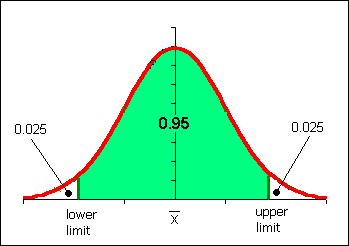

While studying body temperature, our confidence interval of 

98.17 $\pm$ $t^* * 0.035$ 

We know from the CLT that t* should be somewhere around 2 for a 95% confidence interval.

And further, using Python, we know that t* for a 95% confidence interval for the body temperature data = 1.97 (quick check - this is very close to 2).

98.17 $\pm$ 1.97 * 0.035

The margin of error = 1.97 * 0.035 = 0.07.



#recall that we calculated mean_bodytem etc. above.

#Calculate the lower confidence limit

#Calculate the upper confidence limit

In conclusion, we are 95% confident that the population mean healthy human body temperature is between ?????????

### Using the stats interval function

In [ ]:
#We set the loc parameter equal to the mean and the
#scale parameter equal to the SE
#Confidence = 0.95 means we want a 95% CI

#### But I want to be X% confident!

Because the confidence level is determined by t* and that's just a number, you can use any confidence level you want.  However, most commonly, we choose to be 90%, 95% or 99% confident.

We can tune the confidence level by changing the alpha parameter in the CI funtion.

In [ ]:
#90% Confidence Interval

#95% Confidence Interval

#99% Confidence Interval

#100% Confidence?


The 90% confidence interval is the *narrowest* - it includes the smallest range of values - and the 99% confidence interval is the *widest* - it includes the widest range of values.

Confidence intervals are a trade-off between accuracy and precision.

**The more _________ you want to be, the less _________ your CI will be.**

**The less ____________ you are willing to be, the more ___________ your estimate can be.**

### In terms of brownies:

*   We are 90% confident the brownies will be done in 35 - 36 minutes.
*   We are 95% confident the brownies will be done in 34 - 37 minutes.
*   We are 99% confident the brownies will be done in 33 - 39 minutes.
*   We are 100% confident the brownies will be done in 0 - 60 minutes.

The 100% confidence interval is true... but not very helpful.


### Accuracy vs. Precision

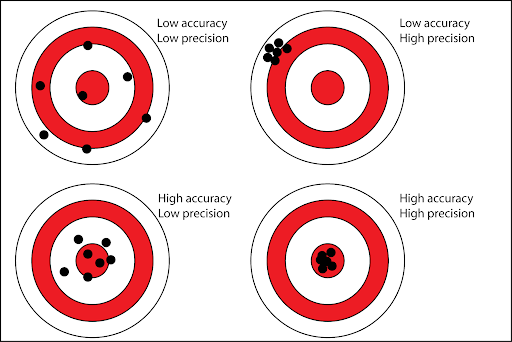

## What about the other 5%

We expect 95% of all 95% CIs to contain the true population mean.  

That means, if we took 20 random samples from the same population, they'd all be different, but we'd expect 19/20 to contain the true population mean and only 1/20 not to contain the true population mean.

![alt text](https://raw.githubusercontent.com/Chelsea-Myers/Lambda-Intro/master/CI%20image.png)


#The correspondence between confidence intervals and hypothesis tests.

If you believe that a C% confidence interval contains the true population mean, and the mean under the null hypothesis does not appear in the confidence interval, you can reject Ho at the alpha (1 - .C) level.

Note: This only works for two-sided confidence intervals paired with two-sided hypothesis tests (the only kind we are discussing in class).

We are 95% confident that the population mean healthy human body temperature is between 98.10 and 98.23 degrees F.

Therefore, we can conclude that we would reject the null hypothesis that the mean healthy human body temperature is 98.6 degrees F at the alpha = 0.05 level.


There are four things that can happen when we conduct a hypothesis test:

|          |                   |     Truth    |              |   |
|:--------:|:-----------------:|:------------:|--------------|---|
|          |                   |  Ho is true  |  Ha is true  |   |
| Decision |     Reject Ho     | Type 1      |    Correct   |   |
|          | Fail to reject Ho |    Correct   | Type 2     |   |

A ________ error occurs when you _______ the null hypothesis but it is really ___________.  The chance of making a type 1 error = __________ level.

A _______ error occurs when you ________ the null hypothesis when the __________ is really true.  This is hard to calculate because it relies on a lot of assumptions about what's really going on if the alternative hypothesis is really true.

When we suspect we are making a type 2 error, we say we are ____________ to reject the null hypothesis.

> The statistical power of a study (sometimes called sensitivity) is how likely the study is to distinguish an actual effect from one of chance. It’s the likelihood that the test is correctly rejecting the null hypothesis (i.e. “proving” your hypothesis). For example, a study that has an 80% power means that the study has an 80% chance of the test having significant results.

### Confidence intervals and sample size

If we increased the sample size from 223 to 500 but the sample mean and SD remained the same, describe two ways the margin of error would change. Would the margin of error become smaller or larger?

In [ ]:


t_star = t.ppf(0.975,df=??????)


n_bodytemp = ???????
se_bodytemp = sd_bodytemp/(n_bodytemp**(1/2))

mean_bodytemp + (t_star * se_bodytemp)

ME = t_star*se_bodytemp
print('ME =',ME)

SyntaxError: invalid syntax (<ipython-input-52-666fe47a7356>, line 1)

### P-hacking

aka - the problem of ___________

___________ is the practice of doing a bunch of hypothesis tests or creating a bunch of confidence intervals until you find one that is ___________

The problem is that - just by chance - we expect to ___________ the null hypothesis ___________ about ___________ of the time.  

eg: If you do ___________ hypothesis tests, you can expect ___________ to be statistically significant just by chance.

Always lay out your hypotheses before you start working with your data and - if you want to make multiple comparisons - make sure to adjust for that with your significance level.


## Breakout Practice

Calculate the critical value (t*) housing prices in the Ames, Iowa area.

In [ ]:
house = pd.read_csv('https://raw.githubusercontent.com/LambdaSchool/data-science-practice-datasets/main/unit_1/Housing/Ames%20Iowa%20Housing%20Data.csv')

- Calculate your confidence interval for housing sale prices in the Ames, Iowa area at a confidence level of 90%, 95%, and 99%. 

- What happens to your results if you calculate the confidence interval at 100%?